# Proyecto de clasificación utilizando ANN - Lending Club

### Datos del proyecto

Dataset: LendingClub Dataset de kaggle - https://www.kaggle.com/wordsforthewise/lending-club

Descripción del dataset: LendingClub es una empresa situada en San Francisco, EE.UU., que se encarga de prestamos P2P (peer-to-peer)

Objetivo: Dada la información histórica, intentar predecir si un préstamo va a defaultear o va a ser pago.

Tipo de problema: clasificación binaria

### Información del dataset 


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>


### Información de atributos 

In [1]:
import pandas as pd

In [2]:
info_datos = pd.read_csv("lending_club_info.csv", index_col = "LoanStatNew")
info_datos.head(5)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [3]:
def info_atr(nomCol):
    """
        Devuelve una descripción del campo ingresado como parámetro
    """
    print(info_datos.loc[nomCol]["Description"])

### Imports y carga de datos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
datos = pd.read_csv("lending_club_loan.csv")

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [7]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Exploración de datos

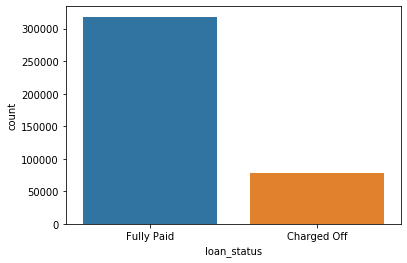

In [8]:
# Cantidad de préstamos pagos y no pagos
sns.countplot(data=datos,x="loan_status")

(0, 40000)

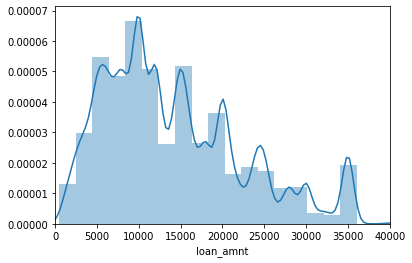

In [9]:
# Distribución de los montos de los préstamos
sns.distplot(datos["loan_amnt"], bins=20)
plt.xlim(0,40000)

In [10]:
"""
Análisis de correlaciones:
    1. Valores numéricos
    2. Heatmap
"""

datos.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

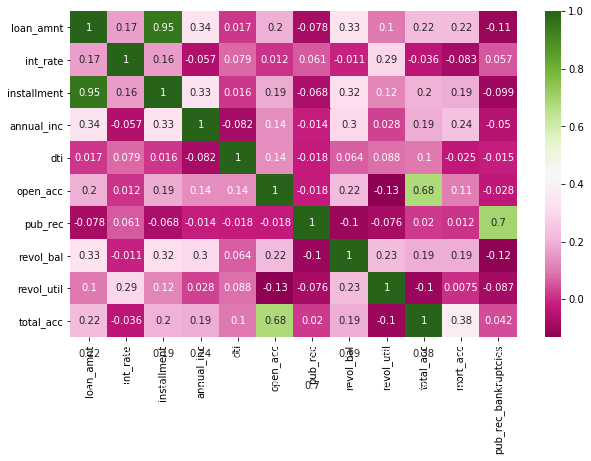

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(datos.corr(), annot=True, cmap="PiYG")
plt.ylim(10,0)

In [13]:
# Análisis de datos con alta correlación
info_atr("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [14]:
info_atr("installment")

The monthly payment owed by the borrower if the loan originates.


In [15]:
# Es de esperarse que el monto total esté fuertemente correlacionado con las cuotas. 

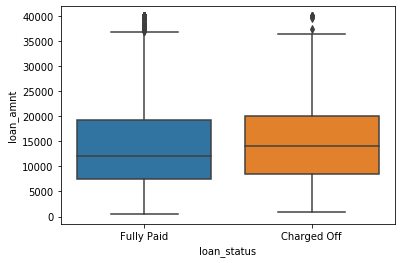

In [16]:
# Análisis de la relación entre monto total del préstamo y el estado del préstamo
sns.boxplot(data=datos, x="loan_status", y="loan_amnt")

In [17]:
datos.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Análisis de defaulteo en función del grado y subgrado del préstamo


In [18]:
info_atr("grade")

LC assigned loan grade


In [19]:
info_atr("sub_grade")

LC assigned loan subgrade


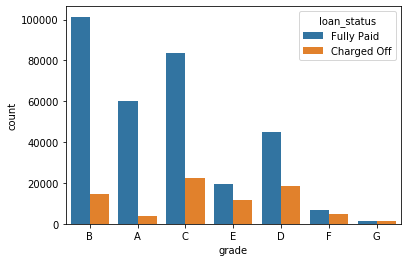

In [20]:
sns.countplot(data=datos, x="grade", hue="loan_status")

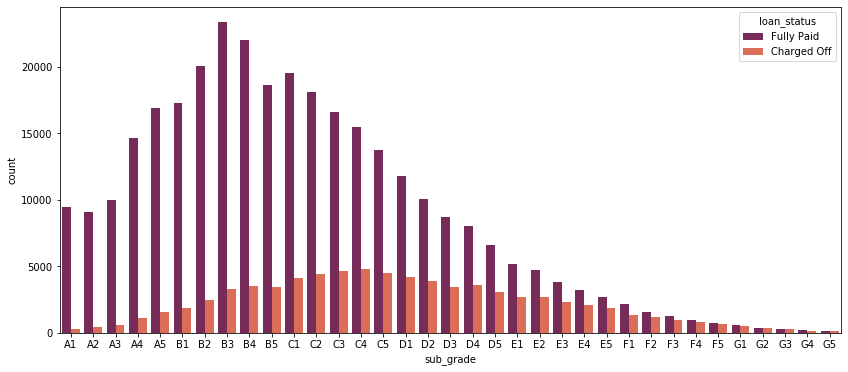

In [21]:
plt.figure(figsize=(14,6))
sns.countplot(data=datos, x="sub_grade", order=sorted(datos["sub_grade"].unique()), hue="loan_status", palette="rocket")

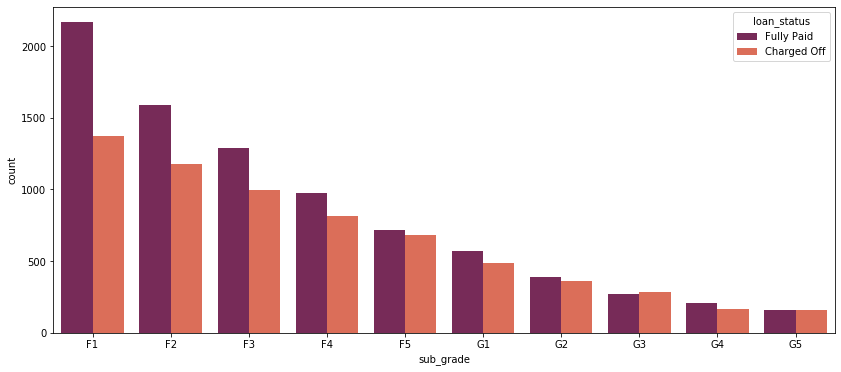

In [22]:
# A partir de F4 es visible que casi tantos pagos como impagos:

plt.figure(figsize=(14,6))
datos_F_G = datos[(datos["grade"]=="F")|(datos["grade"]=="G")]
sns.countplot(data=datos_F_G, 
              x="sub_grade",
              order=sorted(datos_F_G["sub_grade"].unique()),
              hue="loan_status",
              palette="rocket")

In [23]:
# Pasar el loan status a booleano
datos["loan_repaid"] = datos["loan_status"].map({"Fully Paid":1,"Charged Off":0})
datos[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


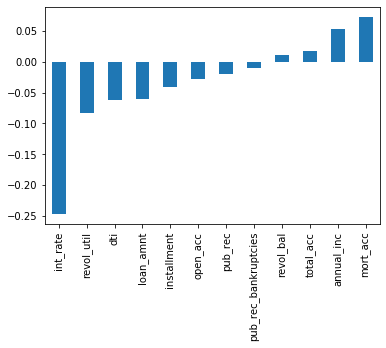

In [24]:
# Correlación entre los atributos numéricos y la columna loan_repaid
datos.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")

In [25]:
# Notar cómo la tasa de interés es la que tiene mayor influencia

## Procesado de datos

In [26]:
# ¿Cuáles atributos presentan datos faltantes? 
datos.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
#¿Qué porcentaje de sus registros están null?
100* datos.isnull().sum() / len(datos)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [28]:
# ¿Qué información tienen esos campos?
info_atr("emp_title")
print("\n")
info_atr("emp_length")

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
# ¿Cuántos empleos distintos hay?
datos["emp_title"].nunique()

173105

In [30]:
# Son demasiados como para encodear con booleanos
datos.drop("emp_title",axis=1, inplace=True)

In [31]:
# ¿Cuáles valores de tiempo como empleados existen?
sorted(datos["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
emp_length_orden = [
                    "< 1 year",
                    "1 year",
                    "2 years",
                    "3 years",
                    "4 years",
                    "5 years",
                    "6 years",
                    "7 years",
                    "8 years",
                    "9 years",
                    "10+ years"
                    ]

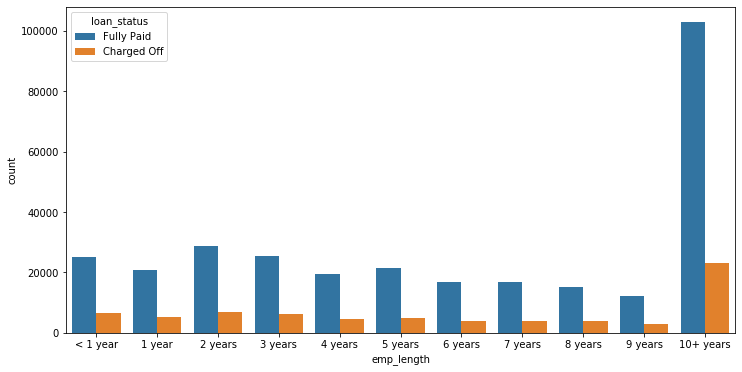

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=datos, x="emp_length",order=emp_length_orden, hue="loan_status")

In [34]:
# ¿Cuál es la relación entre el tiempo que lleven empleados y la capacidad de pagar los préstamos? A priori, la relación parece obvia

emp_paga = datos[datos["loan_status"]== "Fully Paid"].groupby("emp_length").count()["loan_status"]
emp_no_paga = datos[datos["loan_status"]=="Charged Off"].groupby("emp_length").count()["loan_status"]

emp_rel = emp_no_paga/emp_paga
emp_rel


emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [35]:
# Contrario a mi suposición, el número es similar para todos los tiempos como empleado. Por lo que la columna no resulta útil
datos.drop("emp_length", axis=1, inplace=True)

In [36]:
# resto de los campos con nulls

datos.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
# Como podemos ver en la tabla inicial, title representa una descripción de la columna purpose, por lo que podemos dropear 1
info_atr("title")
print("\n")
info_atr("purpose")

The loan title provided by the borrower


A category provided by the borrower for the loan request. 


In [38]:
datos.drop("title", axis=1, inplace=True)

In [39]:
info_atr("mort_acc")

Number of mortgage accounts.


In [40]:
#Correlación respecto a mort_acc
datos.corr()["mort_acc"].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [41]:
#Dado que tiene una correlación considerable con total_acc, podemos aproximar al promedio en función de dicha columna
avg_total_acc = datos.groupby("total_acc").mean()["mort_acc"]
avg_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [42]:
def llenar_mort_acc(total_acc, mort_acc):
    """
    Recibe los valores para total_acc y mort_acc.
    Si mort_acc es null, devuelve el promedio de mort_acc para esa total_acc
    Si no es null, devuelve mort_acc
    total_acc funciona como índice de la serie
    """
    if np.isnan(mort_acc):
        return avg_total_acc[total_acc]
    else:
        return mort_acc

In [43]:
datos["mort_acc"] = datos.apply(lambda reg : llenar_mort_acc(reg["total_acc"], reg["mort_acc"]), axis=1)

In [44]:
100*datos.isnull().sum()/len(datos)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [45]:
# Dado que los registros que quedaron nulos representan menos de un 1.5%, podemos dropearlos
datos = datos.dropna()

In [46]:
# Las columnas numéricas quedaron OK. Faltan las categóricas
datos.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
info_atr("term")

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [48]:
datos["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [49]:
datos["term"] = datos["term"].apply(lambda term:int(term[:3]))

In [50]:
datos["term"].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [51]:
# Dado que grade representa un nivel de menor granularidad de sub_grade, podemos quedarnos con el mayor grado de granularidad y queda OK
datos.drop("grade", axis=1, inplace=True)

In [52]:
# hay que encodear las columnas que tenga sentido para evitar lo categórico
subgrade_encodeadas = pd.get_dummies(datos["sub_grade"],drop_first=True)
datos = pd.concat([datos.drop("sub_grade", axis=1), subgrade_encodeadas], axis=1)
datos.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [53]:
datos["verification_status"].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [54]:
datos["application_type"].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [55]:
datos["initial_list_status"].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [56]:
datos["purpose"].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [57]:
encodeadas = pd.get_dummies(datos[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first=True)
datos.drop(["verification_status", "application_type", "initial_list_status", "purpose"],axis=1, inplace=True)
datos = pd.concat([datos, encodeadas],axis=1)
datos.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [58]:
datos["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [59]:
# Dado que Other, None y Any representan un porcentaje tan pequeño, no tiene sentido encodearlas por separado. Es mejor agruparlas

datos["home_ownership"] = datos["home_ownership"].replace(["NONE","ANY"],"OTHER")
encodeadas = pd.get_dummies(datos["home_ownership"], drop_first=True)
datos.drop("home_ownership",axis=1, inplace=True)
datos = pd.concat([datos, encodeadas],axis=1)
datos.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [60]:
datos["address"].value_counts()

USCGC Smith\r\nFPO AE 70466                              8
USNS Johnson\r\nFPO AE 05113                             8
USS Smith\r\nFPO AP 70466                                8
USS Johnson\r\nFPO AE 48052                              8
USNS Johnson\r\nFPO AP 48052                             7
                                                        ..
Unit 7151 Box 1696\r\nDPO AP 11650                       1
94289 Thompson Crossroad\r\nNew Lindsayport, NE 22690    1
PSC 9330, Box 8861\r\nAPO AA 11650                       1
43662 Myers Road\r\nNew Frankfurt, CT 30723              1
014 Ian Trace\r\nSouth Melvin, MD 48052                  1
Name: address, Length: 392898, dtype: int64

In [61]:
# De la dirección puede interesarnos el código postal
datos["zip_code"] = datos["address"].apply(lambda address:address[-5:])

encodeadas = pd.get_dummies(datos["zip_code"],drop_first=True)
datos.drop(["zip_code","address"],axis=1, inplace=True)
datos = pd.concat([datos,encodeadas],axis=1)
datos.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

In [62]:
info_atr("issue_d")

The month which the loan was funded


In [63]:
# esta columna representaría data leakage, por lo que debemos dropearla
datos.drop("issue_d", axis=1, inplace=True)

In [64]:
datos["earliest_cr_line"].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Nov-1957       1
Feb-1962       1
Sep-1961       1
Jan-1953       1
Jul-1960       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [65]:
# De earliest credit line, nos puede interesar el año
datos["earliest_cr_year"] = datos["earliest_cr_line"].apply(lambda fecha:int(fecha[-4:]))
datos.drop("earliest_cr_line",axis=1, inplace=True)

In [66]:
# El campo categórico que nos queda ya fue encodeado más temprano, podemos dropearlo
datos.select_dtypes(["object"]).columns

Index(['loan_status'], dtype='object')

In [67]:
datos.drop("loan_status",axis=1, inplace=True)

## División de dataset 

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = datos.drop("loan_repaid",axis=1).values
y = datos["loan_repaid"].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [71]:
# Normalización de datos
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

## Creación del modelo

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [79]:
X_train.shape

(276653, 78)

In [80]:
modelo = Sequential()

#capa input
modelo.add(Dense(78,activation="relu"))
modelo.add(Dropout(0.2))

#capas internas
modelo.add(Dense(39,activation="relu"))
modelo.add(Dropout(0.2))

modelo.add(Dense(18,activation="relu"))
modelo.add(Dropout(0.2))

#capa output
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(loss="binary_crossentropy", optimizer="adam")


In [81]:
modelo.fit(x=X_train, y=y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Train on 276653 samples, validate on 118566 samples
Epoch 1/25
276653/276653 [==============================] - 27s 99us/sample - loss: 0.2911 - val_loss: 0.2640
Epoch 2/25
276653/276653 [==============================] - 25s 91us/sample - loss: 0.2642 - val_loss: 0.2632
Epoch 3/25
276653/276653 [==============================] - 25s 89us/sample - loss: 0.2619 - val_loss: 0.2623
Epoch 4/25
276653/276653 [==============================] - 24s 88us/sample - loss: 0.2612 - val_loss: 0.2617
Epoch 5/25
276653/276653 [==============================] - 25s 89us/sample - loss: 0.2605 - val_loss: 0.2624
Epoch 6/25
276653/276653 [==============================] - 24s 88us/sample - loss: 0.2598 - val_loss: 0.2618
Epoch 7/25
276653/276653 [==============================] - 25s 89us/sample - loss: 0.2595 - val_loss: 0.2615
Epoch 8/25
276653/276653 [==============================] - 24s 88us/sample - loss: 0.2593 - val_loss: 0.2624
Epoch 9/25
276653/276653 [==============================] - 26s 93us

In [82]:
# guardar el modelo

from tensorflow.keras.models import load_model

modelo.save("full_modelo_project.h5")

## Evaluación del modelo

In [84]:
loss = pd.DataFrame(modelo.history.history)

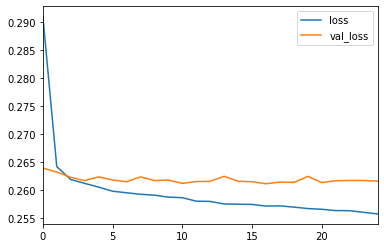

In [85]:
loss[["loss","val_loss"]].plot()

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
predictions = modelo.predict_classes(X_test)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [89]:
confusion_matrix(y_test,predictions)

array([[10104, 13259],
       [  118, 95085]])

In [90]:
import random
random.seed(61)
random_ind = random.randint(0,len(datos))

nuevo_cliente = datos.drop("loan_repaid",axis=1).iloc[random_ind]
nuevo_cliente

loan_amnt             6400.00
term                    36.00
int_rate                16.55
installment            226.75
annual_inc          106000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      1999.00
Name: 259796, Length: 78, dtype: float64

In [91]:
modelo.predict_classes(nuevo_cliente.values.reshape(1,78))

array([[1]], dtype=int32)

In [92]:
datos.iloc[random_ind]["loan_repaid"]

1.0